In [1]:
import numpy as np
import matplotlib.pyplot as plt

No. of iterations required for convergence:  17045


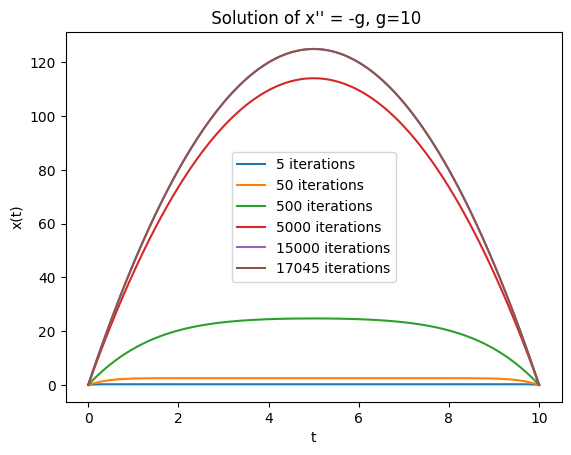

In [2]:
# define the function for the differential equation
def f1(t, y):
    g = 10
    return - g * np.ones(len(t))


def relaxation_method(f, t0, y0,tf, yf, h, tol = 1e-4, max_iteration = int(1e6)):
    n = int((tf - t0)/h)

    t_array = [t0 + i*h for i in range(n+1)]

    y_array = np.zeros(len(t_array))

    y_array[0] = y0
    y_array[-1] = yf

    y_matrix = np.zeros((max_iteration, len(t_array)))
    
    y_matrix[0,:] = y_array

    for j in range(1, int(max_iteration)):

        y_array[1:-1] = 0.5 * (y_array[0:-2] + y_array[2:]) - 0.5 * (h**2) * f(t_array[1:-1], y_array[1:-1])

        y_matrix[j,:] = y_array

        if np.linalg.norm(y_matrix[j,:] - y_matrix[j-1,:]) < tol:
            return t_array, y_matrix[0:j+1], j


    return  t_array, y_matrix, "Solution does not converge"


t0 = 0
tf = 10
x0 = 0
xf = 0
h = 0.1


t_array,x_matrix, iteration = relaxation_method(f1, t0, x0, tf, xf, h)

print("No. of iterations required for convergence: ", iteration)

iteration_array = [5, 50, 500, 5000, 15000, iteration]

for i in iteration_array:
    plt.plot(t_array, x_matrix[i,:], label = f"{i} iterations")

plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(" Solution of x'' = -g, g=10")
plt.legend()
plt.show()